In [1]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
import numpy as np
import pandas as pd
from time import time
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np

x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

In [3]:
# gnb_org = GaussianNB()
# gnb_org.fit(x_train, y_train)
# y_pred_org = gnb_org.predict(x_test)

# accuracy_gnb = accuracy_score(y_test, y_pred_org)
# micro_f1_gnb = f1_score_rep(y_test, y_pred_org, average="micro")
# macro_f1_gnb = f1_score_rep(y_test, y_pred_org, average="macro")

# print(f'Gaussian Naive Bayes Test Accuracy: {accuracy_gnb * 100:.2f}%')
# print(f'Gaussian Naive Bayes Micro F1 Score: {micro_f1_gnb}')
# print(f'Gaussian Naive Bayes Macro F1 Score: {macro_f1_gnb}')

In [4]:



# # 定义参数
# gnb_params = {
#     'var_smoothing': np.logspace(0, -9, num=100)
# }

# # 确保结果目录存在
# # result_dir = Path('/content/drive/MyDrive/Data/results')
# # if not result_dir.exists():
# #     result_dir.mkdir()

# def tune_with_halving_grid_search_gnb(x_train, y_train, param_grid):
#     gnb = GaussianNB()

#     start = time()
#     halving_gnb_results = HalvingGridSearchCV(
#         gnb,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_gnb_results.cv_results_)
#     # results.to_csv(result_dir / 'halving_gnb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_gnb(x_val, y_val, gnb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 GNB 模型
# best_gnb = GaussianNB(**best_params)
# best_gnb.fit(x_train, y_train)

# # # 在测试集上评估
# # accuracy = accuracy_score(y_test, best_gnb.predict(x_test))
# # micro_f1 = f1_score_rep(y_test, best_gnb.predict(x_test), average="micro")
# # macro_f1 = f1_score_rep(y_test, best_gnb.predict(x_test), average="macro")

# # # 打印结果
# # print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# # print(f'Params: {best_params}')
# # print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# # print("Micro F1 Score: ", micro_f1)
# # print("Macro F1 Score: ", macro_f1)


FPR: [0.03003755 0.         0.01436266 0.        ]
TPR: [0.8128655 1.        0.9380805 1.       ]
FNR: [0.1871345 0.        0.0619195 0.       ]
TNR: [0.96996245 1.         0.98563734 1.        ]
Precision: 0.8798455598455599
Accuracy: 0.9635141622659625
F1-score: 0.9015962279904718
AUC: 0.9971228823240196
FPR: 0.011100051006307256
tpr: 0.9377364981080152
fnr: 0.06226350189198486
tnr: 0.9888999489936927


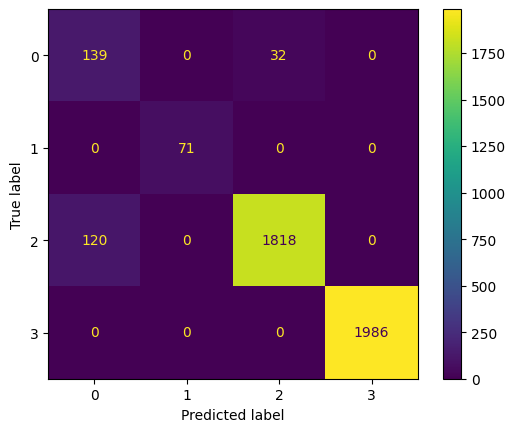

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

best_gnb = GaussianNB(var_smoothing = 0.012328467394420659)
best_gnb.fit(x_train, y_train)

y_pred = best_gnb.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_gnb.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=best_gnb.classes_)
disp.plot()
plt.show()

In [6]:
# mnb_org = MultinomialNB()
# mnb_org.fit(x_train, y_train)
# y_pred_mnb = mnb_org.predict(x_test)

# accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
# micro_f1_mnb = f1_score_rep(y_test, y_pred_mnb, average="micro")
# macro_f1_mnb = f1_score_rep(y_test, y_pred_mnb, average="macro")

# print(f'Multinomial Naive Bayes Test Accuracy: {accuracy_mnb * 100:.2f}%')
# print(f'Multinomial Naive Bayes Micro F1 Score: {micro_f1_mnb}')
# print(f'Multinomial Naive Bayes Macro F1 Score: {macro_f1_mnb}')

In [7]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
# import numpy as np
# import pandas as pd
# from time import time
# from pathlib import Path

# # 请确保已经加载了 x_train, y_train, x_test, y_test, x_val, y_val

# # 定义参数
# mnb_params = {
#     'alpha': np.linspace(0.0, 1.0, num=100)  # alpha 值从 0 到 1
# }

# # # 确保结果目录存在
# # result_dir = Path('/content/drive/MyDrive/Data/results')
# # if not result_dir.exists():
# #     result_dir.mkdir()

# def tune_with_halving_grid_search_mnb(x_train, y_train, param_grid):
#     mnb = MultinomialNB()

#     start = time()
#     halving_mnb_results = HalvingGridSearchCV(
#         mnb,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_mnb_results.cv_results_)
#     # results.to_csv(result_dir / 'halving_mnb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_mnb(x_val, y_val, mnb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 MNB 模型
# best_mnb = MultinomialNB(**best_params)
# best_mnb.fit(x_train, y_train)

# # # 在测试集上评估
# # accuracy = accuracy_score(y_test, best_mnb.predict(x_test))
# # micro_f1 = f1_score_rep(y_test, best_mnb.predict(x_test), average="micro")
# # macro_f1 = f1_score_rep(y_test, best_mnb.predict(x_test), average="macro")

# # # 打印结果
# # print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# # print(f'Params: {best_params}')
# # print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# # print("Micro F1 Score: ", micro_f1)
# # print("Macro F1 Score: ", macro_f1)


In [8]:
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.datasets import load_digits

# # best_mnb = MultinomialNB(alpha= 0.0)
# # best_mnb.fit(x_train, y_train)

# y_pred = best_mnb.predict(x_test)

# conf_matrix = confusion_matrix(y_test, y_pred)
# # tn, fp, fn, tp = conf_matrix.ravel()
# cm = conf_matrix
# fp = cm.sum(axis=0) - np.diag(cm)
# fn = cm.sum(axis=1) - np.diag(cm)
# tp = np.diag(cm)
# tn = cm.sum() - (fp + fn + tp)


# fpr = fp / (fp + tn)
# tpr = tp / (tp + fn)
# fnr = fn / (fn + tp)
# tnr = tn / (tn + fp)
# precision = precision_score(y_test, y_pred, average='macro')
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='macro')
# auc = roc_auc_score(y_test, best_mnb.predict_proba(x_test), multi_class='ovr')

# print(f"FPR: {fpr}")
# print(f"TPR: {tpr}")
# print(f"FNR: {fnr}")
# print(f"TNR: {tnr}")
# print(f"Precision: {precision}")
# print(f"Accuracy: {accuracy}")
# print(f"F1-score: {f1}")
# print(f"AUC: {auc}")

In [9]:
# cnb_org = ComplementNB()
# cnb_org.fit(x_train, y_train)
# y_pred_cnb = cnb_org.predict(x_test)

# accuracy_cnb = accuracy_score(y_test, y_pred_cnb)
# micro_f1_cnb = f1_score_rep(y_test, y_pred_cnb, average="micro")
# macro_f1_cnb = f1_score_rep(y_test, y_pred_cnb, average="macro")

# print(f'Complement Naive Bayes Test Accuracy: {accuracy_cnb * 100:.2f}%')
# print(f'Complement Naive Bayes Micro F1 Score: {micro_f1_cnb}')
# print(f'Complement Naive Bayes Macro F1 Score: {macro_f1_cnb}')

In [10]:
# from sklearn.naive_bayes import ComplementNB
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
# import numpy as np
# import pandas as pd
# from time import time
# from pathlib import Path

# # 请确保已经加载了 x_train, y_train, x_test, y_test, x_val, y_val

# # 定义参数
# cnb_params = {
#     'alpha': np.linspace(0.0, 1.0, num=100)  # alpha 值从 0 到 1
# }

# # # 确保结果目录存在
# # result_dir = Path('/content/drive/MyDrive/Data/results')
# # if not result_dir.exists():
# #     result_dir.mkdir()

# def tune_with_halving_grid_search_cnb(x_train, y_train, param_grid):
#     cnb = ComplementNB()

#     start = time()
#     halving_cnb_results = HalvingGridSearchCV(
#         cnb,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_cnb_results.cv_results_)
#     # results.to_csv(result_dir / 'halving_cnb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_cnb(x_val, y_val, cnb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 CNB 模型
# best_cnb = ComplementNB(**best_params)
# best_cnb.fit(x_train, y_train)

# # # 在测试集上评估
# # accuracy = accuracy_score(y_test, best_cnb.predict(x_test))
# # micro_f1 = f1_score_rep(y_test, best_cnb.predict(x_test), average="micro")
# # macro_f1 = f1_score_rep(y_test, best_cnb.predict(x_test), average="macro")

# # # 打印结果
# # print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# # print(f'Params: {best_params}')
# # print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# # print("Micro F1 Score: ", micro_f1)
# # print("Macro F1 Score: ", macro_f1)

In [11]:
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.datasets import load_digits

# # best_cnb = ComplementNB(alpha= 0.010101010101010102)
# # best_cnb.fit(x_train, y_train)

# y_pred = best_cnb.predict(x_test)

# conf_matrix = confusion_matrix(y_test, y_pred)
# # tn, fp, fn, tp = conf_matrix.ravel()
# cm = conf_matrix
# fp = cm.sum(axis=0) - np.diag(cm)
# fn = cm.sum(axis=1) - np.diag(cm)
# tp = np.diag(cm)
# tn = cm.sum() - (fp + fn + tp)


# fpr = fp / (fp + tn)
# tpr = tp / (tp + fn)
# fnr = fn / (fn + tp)
# tnr = tn / (tn + fp)
# precision = precision_score(y_test, y_pred, average='macro')
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='macro')
# auc = roc_auc_score(y_test, best_cnb.predict_proba(x_test), multi_class='ovr')

# print(f"FPR: {fpr}")
# print(f"TPR: {tpr}")
# print(f"FNR: {fnr}")
# print(f"TNR: {tnr}")
# print(f"Precision: {precision}")
# print(f"Accuracy: {accuracy}")
# print(f"F1-score: {f1}")
# print(f"AUC: {auc}")

In [12]:
# bnb_org = BernoulliNB()
# bnb_org.fit(x_train, y_train)
# y_pred_bnb = bnb_org.predict(x_test)

# accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
# micro_f1_bnb = f1_score_rep(y_test, y_pred_bnb, average="micro")
# macro_f1_bnb = f1_score_rep(y_test, y_pred_bnb, average="macro")

# print(f'Bernoulli Naive Bayes Test Accuracy: {accuracy_bnb * 100:.2f}%')
# print(f'Bernoulli Naive Bayes Micro F1 Score: {micro_f1_bnb}')
# print(f'Bernoulli Naive Bayes Macro F1 Score: {macro_f1_bnb}')

In [13]:
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
# import numpy as np
# import pandas as pd
# from time import time
# from pathlib import Path

# # 请确保已经加载了 x_train, y_train, x_test, y_test, x_val, y_val

# # 定义参数
# bnb_params = {
#     'alpha': np.linspace(0.0, 1.0, num=100),  # alpha 值从 0 到 1
#     'binarize': np.linspace(0.0, 1.0, num=20)  # binarize 阈值
# }

# # 确保结果目录存在
# # result_dir = Path('/content/drive/MyDrive/Data/results')
# # if not result_dir.exists():
# #     result_dir.mkdir()

# def tune_with_halving_grid_search_bnb(x_train, y_train, param_grid):
#     bnb = BernoulliNB()

#     start = time()
#     halving_bnb_results = HalvingGridSearchCV(
#         bnb,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_bnb_results.cv_results_)
#     # results.to_csv(result_dir / 'halving_bnb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_bnb(x_val, y_val, bnb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 BNB 模型
# best_bnb = BernoulliNB(**best_params)
# best_bnb.fit(x_train, y_train)

# # # 在测试集上评估
# # accuracy = accuracy_score(y_test, best_bnb.predict(x_test))
# # micro_f1 = f1_score_rep(y_test, best_bnb.predict(x_test), average="micro")
# # macro_f1 = f1_score_rep(y_test, best_bnb.predict(x_test), average="macro")

# # # 打印结果
# # print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# # print(f'Params: {best_params}')
# # print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# # print("Micro F1 Score: ", micro_f1)
# # print("Macro F1 Score: ", macro_f1)


FPR: [0.         0.         0.02827648 0.        ]
TPR: [0.63157895 1.         1.         1.        ]
FNR: [0.36842105 0.         0.         0.        ]
TNR: [1.         1.         0.97172352 1.        ]
Precision: 0.9921289355322339
Accuracy: 0.9848775804128661
F1-score: 0.9395499103260202
AUC: 0.9967971508959125
FPR: 0.007069120287253142
tpr: 0.9078947368421053
fnr: 0.09210526315789473
tnr: 0.9929308797127468


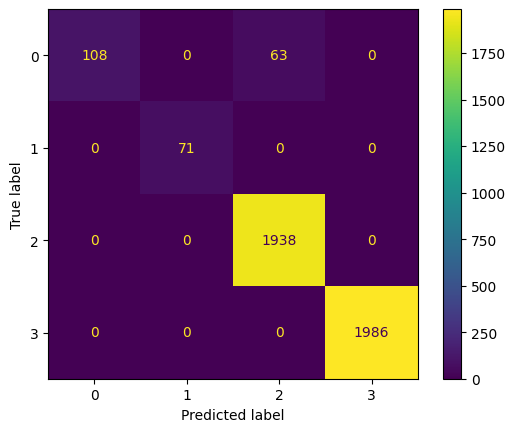

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

best_bnb = BernoulliNB(alpha=0.43434343434343436, binarize=0.5789473684210527)
best_bnb.fit(x_train, y_train)

y_pred = best_bnb.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_bnb.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=best_bnb.classes_)
disp.plot()
plt.show()

In [15]:
# ctnb_org = CategoricalNB()
# ctnb_org.fit(x_train, y_train)
# y_pred_ctnb = ctnb_org.predict(x_test)

# accuracy_ctnb = accuracy_score(y_test, y_pred_ctnb)
# micro_f1_ctnb = f1_score_rep(y_test, y_pred_ctnb, average="micro")
# macro_f1_ctnb = f1_score_rep(y_test, y_pred_ctnb, average="macro")

# print(f'Categorical Naive Bayes Test Accuracy: {accuracy_ctnb * 100:.2f}%')
# print(f'Categorical Naive Bayes Micro F1 Score: {micro_f1_ctnb}')
# print(f'Categorical Naive Bayes Macro F1 Score: {macro_f1_ctnb}')

In [16]:
# from sklearn.naive_bayes import CategoricalNB
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
# import numpy as np
# import pandas as pd
# from time import time
# from pathlib import Path

# # 请确保已经加载了 x_train, y_train, x_test, y_test, x_val, y_val

# # 定义参数
# ctnb_params = {
#     'alpha': np.linspace(0.0, 1.0, num=100)  # alpha 值从 0 到 1
# }

# # 确保结果目录存在
# # result_dir = Path('/content/drive/MyDrive/Data/results')
# # if not result_dir.exists():
# #     result_dir.mkdir()

# def tune_with_halving_grid_search_ctnb(x_train, y_train, param_grid):
#     ctnb = CategoricalNB()

#     start = time()
#     halving_ctnb_results = HalvingGridSearchCV(
#         ctnb,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_ctnb_results.cv_results_)
#     # results.to_csv(result_dir / 'halving_ctnb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_ctnb(x_val, y_val, ctnb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 CTNB 模型
# best_ctnb = CategoricalNB(**best_params)
# best_ctnb.fit(x_train, y_train)

# # # 在测试集上评估
# # accuracy = accuracy_score(y_test, best_ctnb.predict(x_test))
# # micro_f1 = f1_score_rep(y_test, best_ctnb.predict(x_test), average="micro")
# # macro_f1 = f1_score_rep(y_test, best_ctnb.predict(x_test), average="macro")

# # # 打印结果
# # print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# # print(f'Params: {best_params}')
# # print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# # print("Micro F1 Score: ", micro_f1)
# # print("Macro F1 Score: ", macro_f1)


In [17]:
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.datasets import load_digits

# best_ctnb = CategoricalNB()
# best_ctnb.fit(x_train, y_train)

# y_pred = best_ctnb.predict(x_test)

# conf_matrix = confusion_matrix(y_test, y_pred)
# # tn, fp, fn, tp = conf_matrix.ravel()
# cm = conf_matrix
# fp = cm.sum(axis=0) - np.diag(cm)
# fn = cm.sum(axis=1) - np.diag(cm)
# tp = np.diag(cm)
# tn = cm.sum() - (fp + fn + tp)


# fpr = fp / (fp + tn)
# tpr = tp / (tp + fn)
# fnr = fn / (fn + tp)
# tnr = tn / (tn + fp)
# precision = precision_score(y_test, y_pred, average='macro')
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='macro')
# auc = roc_auc_score(y_test, best_ctnb.predict_proba(x_test), multi_class='ovr')

# print(f"FPR: {fpr}")
# print(f"TPR: {tpr}")
# print(f"FNR: {fnr}")
# print(f"TNR: {tnr}")
# print(f"Precision: {precision}")
# print(f"Accuracy: {accuracy}")
# print(f"F1-score: {f1}")
# print(f"AUC: {auc}")

In [3]:
import numpy as np
x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

from joblib import dump, load
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

best_gnb = GaussianNB(var_smoothing = 0.012328467394420659)
best_gnb.fit(x_train, y_train)
dump(best_gnb, "/home/jovyan/Edge-IIoT/pre_train/GNB.joblib")

# best_mnb = MultinomialNB(alpha= 0.0)
# best_mnb.fit(x_train, y_train)
# dump(best_mnb, "/home/jovyan/Edge-IIoT/pre_train/MNB.joblib")

# best_cnb = ComplementNB(alpha= 0.010101010101010102)
# best_cnb.fit(x_train, y_train)
# dump(best_cnb, "/home/jovyan/Edge-IIoT/pre_train/CNB.joblib")

best_bnb = BernoulliNB(alpha=0.43434343434343436, binarize=0.5789473684210527)
best_bnb.fit(x_train, y_train)
dump(best_bnb, "/home/jovyan/Edge-IIoT/pre_train/BNB.joblib")



['/home/jovyan/Edge-IIoT/pre_train/BNB.joblib']